In [52]:
import os
import torch
import pickle 
from config import get_cfg_defaults
from data import SOS_ID

from transformer import subsequent_mask
from torch.autograd import Variable

In [53]:
from translate import encode_sentence

In [54]:
DEVICE = torch.device('cpu')

In [55]:
exp_root = "/home/johann/sonstiges/transformer-pytorch/exps/2022-03-19_64_3_100"

In [56]:
cfg = get_cfg_defaults()
cfg.merge_from_file(os.path.join(exp_root, 'config.yaml'))
cfg.freeze()

In [57]:
with open(os.path.join(exp_root, 'dataset.file'), 'rb') as fp:
    dataset = pickle.load(fp)

In [58]:
dataset.src_lang

'en'

In [59]:
model_checkpoint = os.path.join(exp_root, "en-de-model-iter-0000020000.pt")
model = torch.load(model_checkpoint)
model.eval()
model.to(DEVICE)

Transformer(
  (encoder): Encoder(
    (layers): ModuleList(
      (0): EncoderLayer(
        (self_attn): MultiHeadedAttention(
          (linears): ModuleList(
            (0): Linear(in_features=512, out_features=512, bias=True)
            (1): Linear(in_features=512, out_features=512, bias=True)
            (2): Linear(in_features=512, out_features=512, bias=True)
            (3): Linear(in_features=512, out_features=512, bias=True)
          )
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (feed_forward): PositionwiseFeedForward(
          (w_1): Linear(in_features=512, out_features=2048, bias=True)
          (w_2): Linear(in_features=2048, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (sublayer): ModuleList(
          (0): SublayerConnection(
            (norm): LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): SublayerConnection(
            (norm): LayerNorm()
  

In [60]:
test_sentence = "hi my name is johann and i am a scientific researcher from germany who loves hacking."

In [61]:
encoded = encode_sentence(cfg, dataset, test_sentence)

In [62]:
print(encoded)

[35856, 30995, 32578, 24216, 4980, 6980, 17841, 31700, 33771, 16056, 15923, 25109, 31785, 2769, 22645, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [63]:
encoded = torch.tensor(encoded).unsqueeze(0).to(DEVICE)
encoded

tensor([[35856, 30995, 32578, 24216,  4980,  6980, 17841, 31700, 33771, 16056,
         15923, 25109, 31785,  2769, 22645,     1,     3,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]])

In [64]:
encoded_mask = (encoded != 0).unsqueeze(-2).to(DEVICE)
encoded_mask

tensor([[[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
           True,  True,  True,  True,  True,  True,  True, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False]]])

In [65]:
encoded = model.encode(encoded, encoded_mask)

In [66]:
tgt = torch.ones(1,1).fill_(SOS_ID)
tgt = tgt.long()
tgt

tensor([[2]])

In [67]:
with torch.no_grad():
    for i in range(99):
        out = model.decode(
            encoded, encoded_mask, 
            Variable(tgt), Variable(subsequent_mask(tgt.size(1)))
        )
        probs = model.generator(out[:, -1])
        _, nextword = torch.max(probs, dim=1)
        nextword = nextword.item()
        tgt = torch.cat([
            tgt, torch.ones(1,1).fill_(nextword).long()
        ], dim=1)
        

In [68]:
translation_ = tgt[0].detach().cpu().numpy().tolist()
print(translation)

[2, 35511, 35916, 30362, 11618, 33488, 10529, 27807, 25071, 7560, 1, 12780, 18759, 41514, 7122, 1, 28882, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [69]:
def decode_sentence(idx2word, sentence: list) -> str:
    sen_l = [idx2word[w] for w in sentence]
    # don't remove <unk>
    red_sen = []
    for w in sen_l:
        if w == '</s>':
            break
        else:
            if w not in ['<s>', '<pad>']:
                red_sen.append(w)
                
    sen = ' '.join(red_sen)
    return sen

In [70]:
translation = decode_sentence(dataset.tgt_idx2word, translation_)
print(translation)

mein name ist freiburg und ich bin ein wissenschaftlichen <unk> aus deutschland , der <unk> .


In [84]:
head = 5
attn_map = model.encoder.layers[0].self_attn.attn[0, head].data[:17, :17]

In [85]:
import matplotlib.pyplot as plt

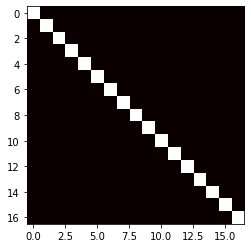

In [86]:
plt.imshow(attn_map, cmap="hot")